In [17]:
import pandas as pd

data=pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [18]:
values=[[] for i in data]
# values
keys=[key for key in data]
# keys
for i in range(len(data)):
    # print(data[i])
    # break
    for key in range(len(keys)):
        # print(data[key][i])
        values[key].append(data[keys[key]][i])
    # break
# print(values)

In [19]:
import numpy as np
for x in range(len(keys)):
    print("column:",keys[x])
    arr=np.array(values[x])
    print("mean:",np.mean(arr),"\tstd dev:",np.std(arr),"\tmin:",np.min(arr),"\tmax:",np.max(arr))
    # print()

column: fixed acidity
mean: 8.311111111111112 	std dev: 1.7468303726275016 	min: 4.6 	max: 15.9
column: volatile acidity
mean: 0.5313385826771653 	std dev: 0.17955459612835617 	min: 0.12 	max: 1.58
column: citric acid
mean: 0.2683639545056868 	std dev: 0.19659979421574741 	min: 0.0 	max: 1.0
column: residual sugar
mean: 2.5321522309711284 	std dev: 1.355324197143589 	min: 0.9 	max: 15.5
column: chlorides
mean: 0.08693263342082239 	std dev: 0.04724665655215518 	min: 0.012 	max: 0.611
column: free sulfur dioxide
mean: 15.615485564304462 	std dev: 10.246001115067605 	min: 1.0 	max: 68.0
column: total sulfur dioxide
mean: 45.91469816272966 	std dev: 32.76778677994138 	min: 6.0 	max: 289.0
column: density
mean: 0.9967304111986001 	std dev: 0.001924224834379527 	min: 0.99007 	max: 1.00369
column: pH
mean: 3.3110148731408575 	std dev: 0.15659551281704315 	min: 2.74 	max: 4.01
column: sulphates
mean: 0.6577077865266842 	std dev: 0.1703241580362606 	min: 0.33 	max: 2.0
column: alcohol
mean: 10.

<BarContainer object of 6 artists>

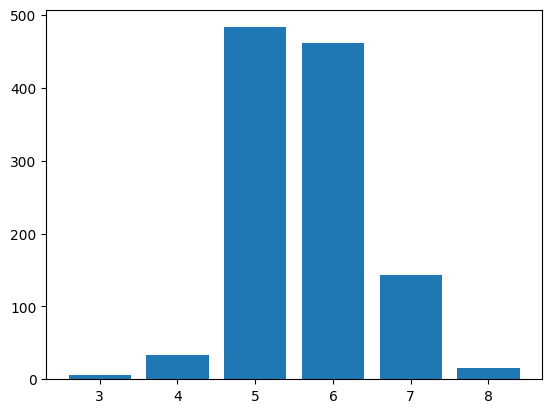

In [20]:
import matplotlib.pyplot as plt

d={}
for i in data["quality"]:
    if i not in d.keys(): d[i]=1
    else: d[i]+=1

x=d.keys()
y=d.values()

plt.bar(x,y)

In [21]:
X,Y=[],[]

for i in range(len(data)):
    xvals=[]
    yvals=[ 0 for i in range(6)]
    for key in keys:
        if key == "quality":
            # Y.append(data[key][i])
            yvals[data[key][i]-3]=1
        else:
            xvals.append(data[key][i])
    X.append(xvals)
    Y.append(yvals)

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# Y = imputer.fit_transform(Y)

scaler = MinMaxScaler()
X= scaler.fit_transform(X)
# Y = scaler.fit_transform(Y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y)


In [23]:
from sklearn.model_selection import train_test_split

x_train,x_oth,y_train,y_oth=train_test_split(X,Y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_oth,y_oth,test_size=0.1,random_state=42)

In [24]:
import numpy as np

class MultinomialLogisticRegression:
    def __init__(self, learning_rate, num_epochs):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def initialize_parameters(self, num_features, num_classes):
        self.weights = np.zeros((num_features, num_classes))
        self.biases = np.zeros(num_classes)

    def softmax(self, scores):
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # print(y_pred)
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)


    def gradient_descent(self, X, y_true, y_pred):
        num_samples = len(y_true)
        dw = np.dot(X.T, (y_pred - y_true)) / num_samples
        db = np.sum(y_pred - y_true) / num_samples
        return dw, db

    def train(self, X_train, y_train, X_valid, y_valid):
        num_features = X_train.shape[1]
        num_classes = 6
        self.initialize_parameters(num_features, num_classes)
        print(num_classes)
        for epoch in range(self.num_epochs):
            scores = np.dot(X_train, self.weights) + self.biases
            y_pred = self.softmax(scores)
            # print(y_pred)
            # print(y_train)
            # Compute loss
            loss = self.cross_entropy_loss(y_train, y_pred)

            dw, db = self.gradient_descent(X_train, y_train, y_pred)

            self.weights -= self.learning_rate * dw
            self.biases -= self.learning_rate * db

            valid_scores = np.dot(X_valid, self.weights) + self.biases
            valid_preds = self.softmax(valid_scores)
            valid_loss = self.cross_entropy_loss(y_valid, valid_preds)
            # print(np.argmax(valid_preds, axis=1))
            # print(valid_preds)
            y_true=[]
            for i in y_valid:
                for j in range(len(i)):
                    if(i[j]==1): 
                        y_true.append(j)
                        break
            # print(y_valid)
            accuracy = np.mean(np.argmax(valid_preds, axis=1) == y_true)

            print(f"Epoch {epoch + 1}/{self.num_epochs}: Loss={loss:.4f}, Valid Loss={valid_loss:.4f}, Accuracy={accuracy:.4f}")

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.biases
        # print(scores)
        return np.argmax(self.softmax(scores), axis=1)


In [26]:
model = MultinomialLogisticRegression(learning_rate=0.01, num_epochs=1000)
model.train(x_train, y_train, x_val, y_val)
y_true=[]
for i in y_test:
    for j in range(len(i)):
        if(i[j]==1): 
            y_true.append(j)
            break
y_pred = model.predict(x_test)
# print(y_pred)
# model_params = model.get_params()

6
Epoch 1/1000: Loss=1.7918, Valid Loss=1.7901, Accuracy=0.5097
Epoch 2/1000: Loss=1.7900, Valid Loss=1.7885, Accuracy=0.5097
Epoch 3/1000: Loss=1.7883, Valid Loss=1.7869, Accuracy=0.5097
Epoch 4/1000: Loss=1.7867, Valid Loss=1.7853, Accuracy=0.5097
Epoch 5/1000: Loss=1.7850, Valid Loss=1.7837, Accuracy=0.5130
Epoch 6/1000: Loss=1.7833, Valid Loss=1.7821, Accuracy=0.5130
Epoch 7/1000: Loss=1.7816, Valid Loss=1.7805, Accuracy=0.5130
Epoch 8/1000: Loss=1.7800, Valid Loss=1.7789, Accuracy=0.5130
Epoch 9/1000: Loss=1.7783, Valid Loss=1.7774, Accuracy=0.5130
Epoch 10/1000: Loss=1.7767, Valid Loss=1.7758, Accuracy=0.5130
Epoch 11/1000: Loss=1.7751, Valid Loss=1.7743, Accuracy=0.5130
Epoch 12/1000: Loss=1.7735, Valid Loss=1.7728, Accuracy=0.5130
Epoch 13/1000: Loss=1.7719, Valid Loss=1.7712, Accuracy=0.5130
Epoch 14/1000: Loss=1.7703, Valid Loss=1.7697, Accuracy=0.5130
Epoch 15/1000: Loss=1.7687, Valid Loss=1.7682, Accuracy=0.5130
Epoch 16/1000: Loss=1.7671, Valid Loss=1.7667, Accuracy=0.5130

In [27]:
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_true, y_pred))

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.93      0.70      0.80        20
           3       0.44      0.33      0.38        12
           4       0.25      0.67      0.36         3

    accuracy                           0.57        35
   macro avg       0.41      0.42      0.39        35
weighted avg       0.71      0.57      0.62        35

Accuracy: 0.5714


/home/sankalp/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sankalp/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sankalp/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
import wandb
wandb.init(project="Multinomial Logistic Regression")

learning_rates = [0.001, 0.01, 0.1]
num_epochs_list = [200, 400, 600, 800, 1000]

for learning_rate in learning_rates:
    for num_epochs in num_epochs_list:
        
        wandb.config.learning_rate = learning_rate
        wandb.config.num_epochs = num_epochs
        
        model = MultinomialLogisticRegression(learning_rate=learning_rate, num_epochs=num_epochs)
        model.train(x_train, y_train, x_val, y_val)
        
        y_true=[]
        for i in y_test:
            for j in range(len(i)):
                if(i[j]==1): 
                    y_true.append(j)
                    break
        y_pred = model.predict(x_test)
        # print(y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        wandb.log({"learning_rate": learning_rate, "num_epochs": num_epochs, "accuracy": accuracy})

accuracy,██▆▆▃▃▁▁▁▃████▆
learning_rate,▁▁▁▁▁▂▂▂▂▂█████
num_epochs,▁▃▅▆█▁▃▅▆█▁▃▅▆█
accuracy,0.6
learning_rate,0.1
num_epochs,1000


6
Epoch 1/200: Loss=1.7918, Valid Loss=1.7916, Accuracy=0.5097
Epoch 2/200: Loss=1.7916, Valid Loss=1.7914, Accuracy=0.5097
Epoch 3/200: Loss=1.7914, Valid Loss=1.7913, Accuracy=0.5097
Epoch 4/200: Loss=1.7912, Valid Loss=1.7911, Accuracy=0.5097
Epoch 5/200: Loss=1.7911, Valid Loss=1.7909, Accuracy=0.5097
Epoch 6/200: Loss=1.7909, Valid Loss=1.7908, Accuracy=0.5097
Epoch 7/200: Loss=1.7907, Valid Loss=1.7906, Accuracy=0.5097
Epoch 8/200: Loss=1.7906, Valid Loss=1.7905, Accuracy=0.5097
Epoch 9/200: Loss=1.7904, Valid Loss=1.7903, Accuracy=0.5097
Epoch 10/200: Loss=1.7902, Valid Loss=1.7901, Accuracy=0.5097
Epoch 11/200: Loss=1.7900, Valid Loss=1.7900, Accuracy=0.5097
Epoch 12/200: Loss=1.7899, Valid Loss=1.7898, Accuracy=0.5097
Epoch 13/200: Loss=1.7897, Valid Loss=1.7896, Accuracy=0.5097
Epoch 14/200: Loss=1.7895, Valid Loss=1.7895, Accuracy=0.5097
Epoch 15/200: Loss=1.7894, Valid Loss=1.7893, Accuracy=0.5097
Epoch 16/200: Loss=1.7892, Valid Loss=1.7891, Accuracy=0.5097
Epoch 17/200: L